
* Nama: Garda Fitrananda
* Nim: 23.11.5440
* Kelas: BDDM2

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. LOAD DATASET
df = pd.read_csv('features_30_sec.csv')
# Menampilkan 5 baris pertama untuk memastikan data masuk
print("Data berhasil di-load. Dimensi data:", df.shape)
df.head()

Data berhasil di-load. Dimensi data: (1000, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [11]:
# 2. DATA PREPROCESSING

df_clean = df.drop(['filename', 'length'], axis=1)

# 2. Label Encoding (Mengubah genre text menjadi angka 0-9)
le = LabelEncoder()
df_clean['label'] = le.fit_transform(df_clean['label'])

# 3. Memisahkan Fitur (X) dan Target (y)
X = df_clean.drop('label', axis=1)
y = df_clean['label']

# 4. Scaling Data (StandardScaler) - agar rentang nilai data seragam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Split Data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Preprocessing selesai.")
print(f"Jumlah data training: {X_train.shape[0]}")
print(f"Jumlah data testing: {X_test.shape[0]}")

Preprocessing selesai.
Jumlah data training: 800
Jumlah data testing: 200


/tmp/ipython-input-3729230917.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=le.inverse_transform(y), palette='viridis')


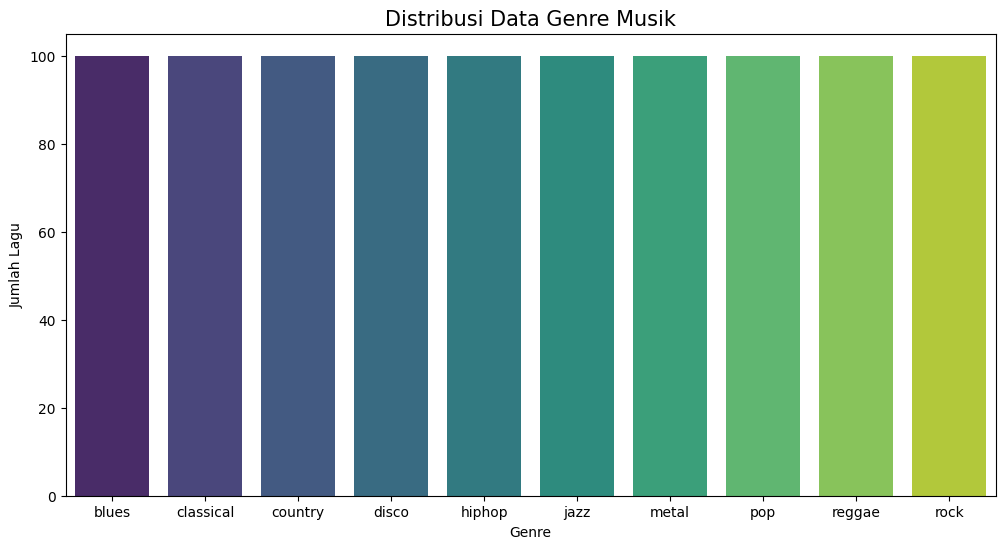

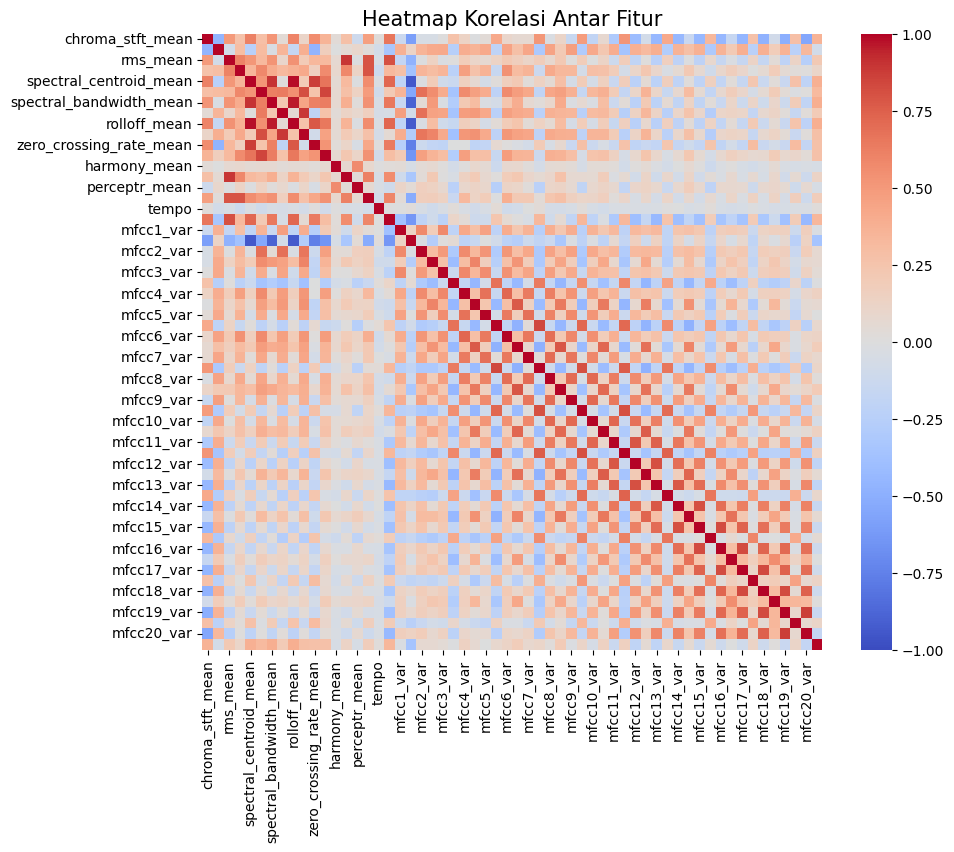

In [12]:
# 3. EDA (Exploratory Data Analysis)

# Visualisasi Distribusi Genre untuk melihat apakah jumlah lagu per genre seimbang
plt.figure(figsize=(12, 6))
sns.countplot(x=le.inverse_transform(y), palette='viridis')
plt.title('Distribusi Data Genre Musik', fontsize=15)
plt.xlabel('Genre')
plt.ylabel('Jumlah Lagu')
plt.show()

# Visualisasi Korelasi (Heatmap)
plt.figure(figsize=(10, 8))
# ambil korelasi dari data yang sudah dibersihkan
sns.heatmap(df_clean.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=15)
plt.show()

In [13]:
# 4. SELEKSI FITUR

# Menggunakan SelectKBest (ANOVA F-value) untuk mengambil 20 fitur terbaik
selector = SelectKBest(score_func=f_classif, k=20)

# Fit ke data training
X_train_selected = selector.fit_transform(X_train, y_train)
# Transform data testing sesuai fitur yang dipilih di training
X_test_selected = selector.transform(X_test)

print(f"Jumlah fitur awal: {X_train.shape[1]}")
print(f"Jumlah fitur setelah seleksi: {X_train_selected.shape[1]}")

Jumlah fitur awal: 57
Jumlah fitur setelah seleksi: 20


In [14]:
# 5. MODELING (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Training model
model.fit(X_train_selected, y_train)

# Prediksi menggunakan data testing
y_pred = model.predict(X_test_selected)

print("Model berhasil dilatih.")

Model berhasil dilatih.


In [16]:
import joblib

# Menyimpan model Random Forest
joblib.dump(model, 'random_forest_model.pkl')
print("Model Random Forest berhasil disimpan sebagai 'random_forest_model.pkl'")

# Menyimpan LabelEncoder
joblib.dump(le, 'label_encoder.pkl')
print("LabelEncoder berhasil disimpan sebagai 'label_encoder.pkl'")

# Menyimpan StandardScaler
joblib.dump(scaler, 'scaler.pkl')
print("StandardScaler berhasil disimpan sebagai 'scaler.pkl'")

Model Random Forest berhasil disimpan sebagai 'random_forest_model.pkl'
LabelEncoder berhasil disimpan sebagai 'label_encoder.pkl'
StandardScaler berhasil disimpan sebagai 'scaler.pkl'


Akurasi Model: 63.00%

Classification Report:
              precision    recall  f1-score   support

       blues       0.57      0.60      0.59        20
   classical       0.93      1.00      0.96        13
     country       0.64      0.52      0.57        27
       disco       0.50      0.57      0.53        21
      hiphop       0.37      0.47      0.41        15
        jazz       0.86      0.86      0.86        22
       metal       0.73      0.88      0.80        25
         pop       0.73      0.62      0.67        13
      reggae       0.52      0.52      0.52        23
        rock       0.50      0.33      0.40        21

    accuracy                           0.63       200
   macro avg       0.64      0.64      0.63       200
weighted avg       0.63      0.63      0.63       200



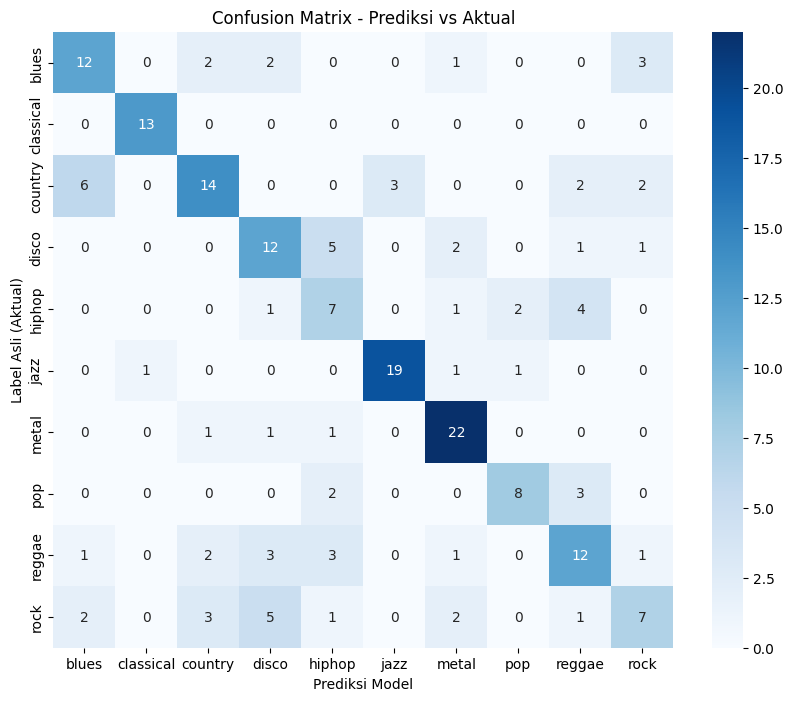

In [15]:
# 6. EVALUASI

# Akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {acc * 100:.2f}%\n")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix Plot
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Prediksi vs Aktual')
plt.xlabel('Prediksi Model')
plt.ylabel('Label Asli (Aktual)')
plt.show()